In [1]:
### Assigned by ###
# Gal Israeli #####
# Yulia Kuderko ###
# Ram Michaeli ####
###################

import pandas as pd
import time
from datetime import datetime as dt, timedelta
import json
import requests
import re
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
import numpy as np
import os
import sys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium import webdriver
from requests import get
import seaborn as sns
from datetime import datetime

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100



In [2]:
df=pd.read_csv("Volcano_after_cleaning.csv")
df

,volcanoName,eruptionCertainty,startDate,maxVEI,evidenceMethod,latitude,longitude,volcanoHeight,country,primaryVolcanoType,population5km,population10km,population30km,population100km
0,Ambae,1,2021 Dec 5,2,Historical Observations,-15.389,167.835,1496,Vanuatu,Shield,73,1279,4326,73308
1,Pinatubo,1,2021 Nov 30,4,Historical Observations,15.130,120.350,1486,Philippines,Stratovolcano,725,3808,1148684,21875048
2,Iliwerung,1,2021 Nov 28,1,Historical Observations,-8.532,123.573,583,Indonesia,Complex,968,4318,79569,665081
3,Taal,1,2021 Nov 15,2,Historical Observations,14.002,120.993,311,Philippines,Caldera,717090,717090,2380326,24814047
4,Turrialba,1,2021 Nov 3,2,Historical Observations,10.025,-83.767,3340,Costa Rica,Stratovolcano,1891,6867,672428,3390544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10631,Tongariro,1,9850 BCE,2,Radiocarbon (corrected),-39.157,175.632,1978,New Zealand,Stratovolcano,27,286,7591,81567
10632,Craters of the Moon,1,0060 BCE,0,Radiocarbon (uncorrected),43.420,-113.500,2005,United States,Pyroclastic cone,15,15,1459,93300
10633,Igwisi Hills,1,0450 BCE,1,Surface Exposure,-4.889,31.933,1146,Tanzania,Pyroclastic cone,37034,37034,105827,774440
10634,Quetrupillan,1,0658 BCE,3,Radiocarbon (corrected),-39.496,-71.722,2360,Chile,Stratovolcano,129,518,11191,269087


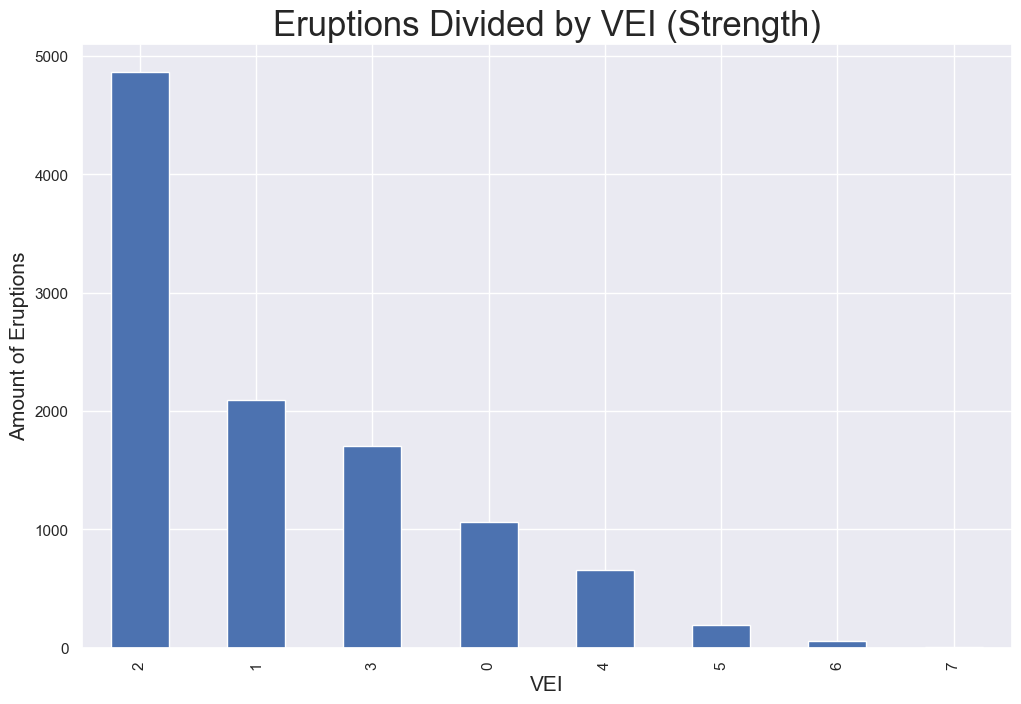

In [12]:
df["maxVEI"].value_counts().plot(kind='bar')
plt.title('Eruptions Divided by VEI (Strength)',fontsize=25)
plt.xlabel('VEI',fontsize=15)
plt.ylabel('Amount of Eruptions',fontsize=15)
plt.grid(color='w', linestyle='solid')
plt.show()

### <u>Here we are showing the latitude and longitude on top of the world map</u>

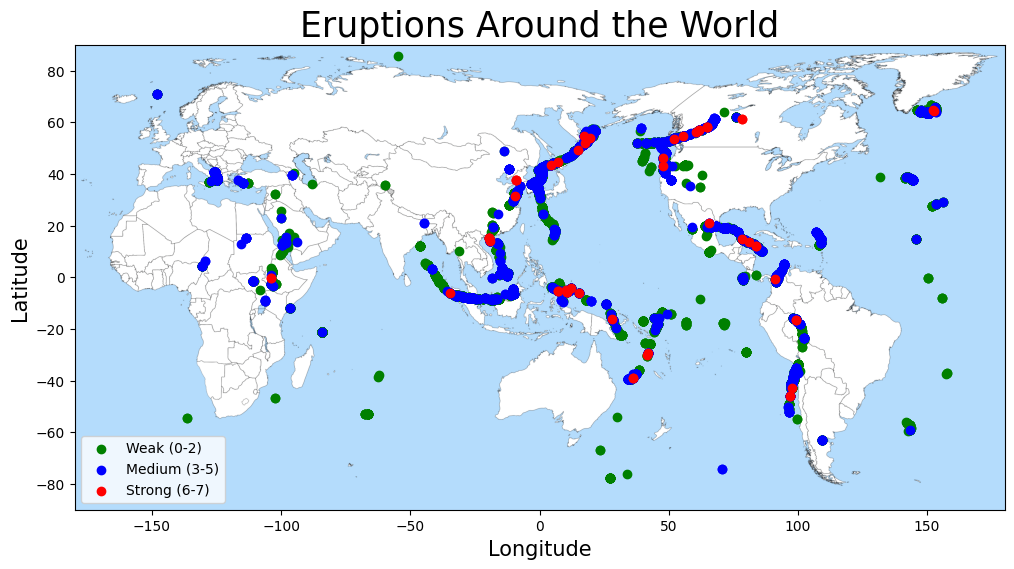

In [4]:
# Here we create 2 lists that will hold lat/long values for all eruptions , seperated by their VEI (0->7)
# each lat/long will go to its corresponding position in the list. (VEI 0 will go to longitudeForWorldMap[0] )

longitudeForWorldMap = [[],[],[],[],[],[],[],[]] 
latitudeForWorldMap = [[],[],[],[],[],[],[],[]]

# Here we fill each array with values , and we change the longitude value by a little bit , so it will 
# fit the background picture of the world map

for i in range(0,len(df['longitude'])):                 
    if df['longitude'][i]<-140:
        longitudeForWorldMap[df['maxVEI'][i]].append(((df['longitude'][i]-40)+360))
        latitudeForWorldMap[df['maxVEI'][i]].append(df['latitude'][i])
    else:
        longitudeForWorldMap[df['maxVEI'][i]].append(df['longitude'][i]-40)
        latitudeForWorldMap[df['maxVEI'][i]].append(df['latitude'][i])


for i in range(0,7):
    for x in range(0,len(longitudeForWorldMap[i])):
        if longitudeForWorldMap[i][x] <-50:
             longitudeForWorldMap[i][x]=210+ longitudeForWorldMap[i][x]
        else:
             longitudeForWorldMap[i][x]=longitudeForWorldMap[i][x] - 100
                 
img = plt.imread("images\worldmap_after_change.png")
fig = plt.figure()
ax = plt.axes()

ax.imshow(img, extent=[-180, 180, -90, 90])


# We divided all the long-lat (Volcano) values to 3 categories , according to the VEI of the eruption 

colors = ["green","blue","red"]

for i in range(0,7):
    if 3>i>=0:
        mycolor=0
    elif 6>i>=3:
        mycolor=1
    elif 7>=i>=6:
        mycolor=2
    ax.scatter(longitudeForWorldMap[i], latitudeForWorldMap[i],c=colors[mycolor])

plt.xlabel('Longitude',fontsize=15)
plt.ylabel('Latitude',fontsize=15)
plt.title('Eruptions Around the World',fontsize=25)
plt.legend(["Weak (0-2)","Medium (3-5)","Strong (6-7)"])

leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('blue')
leg.legendHandles[2].set_color('red')

plt.show()

##      <center> This is the ring of fire , from Wikipedia </center>
<center> <img src="images\wikirof.png" width="600" height="350"> </center>



Text(0.5, 1.0, 'Most Common Volcano Types')

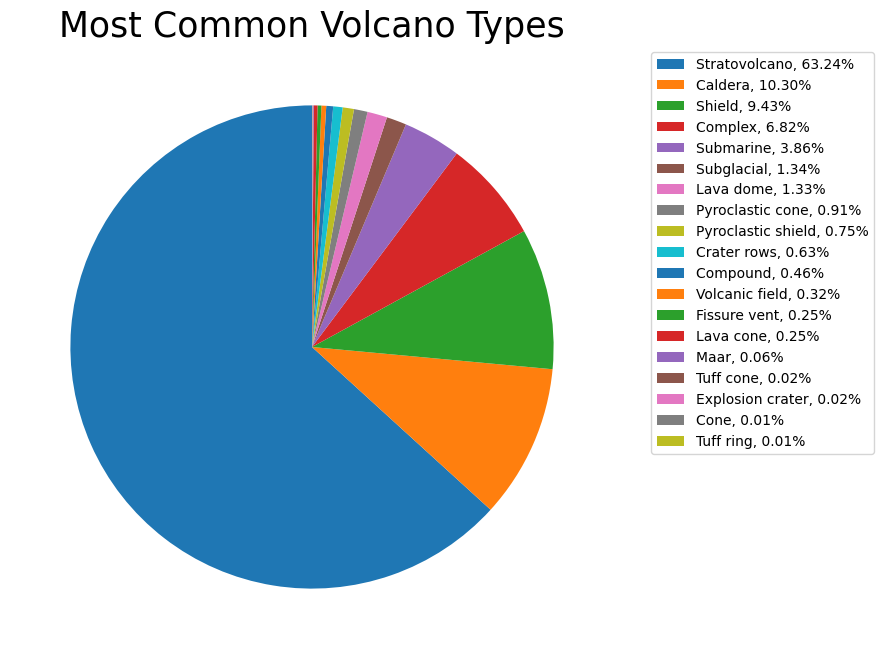

In [5]:
patches, texts = plt.pie(df["primaryVolcanoType"].value_counts(), startangle=90)
labels=list(df["primaryVolcanoType"].value_counts().keys())
sizes =list(df["primaryVolcanoType"].value_counts().values)

for x in range(0,len(sizes)):
    sizes[x]=round(sizes[x]*100/df.shape[0],10)


labels = [f'{l}, {s:0.2f}%' for l, s in zip(labels, sizes)]
plt.legend(patches, list(df["primaryVolcanoType"].value_counts().keys()),labels=labels,bbox_to_anchor=(1.05, 1))
plt.title("Most Common Volcano Types",fontsize=25)

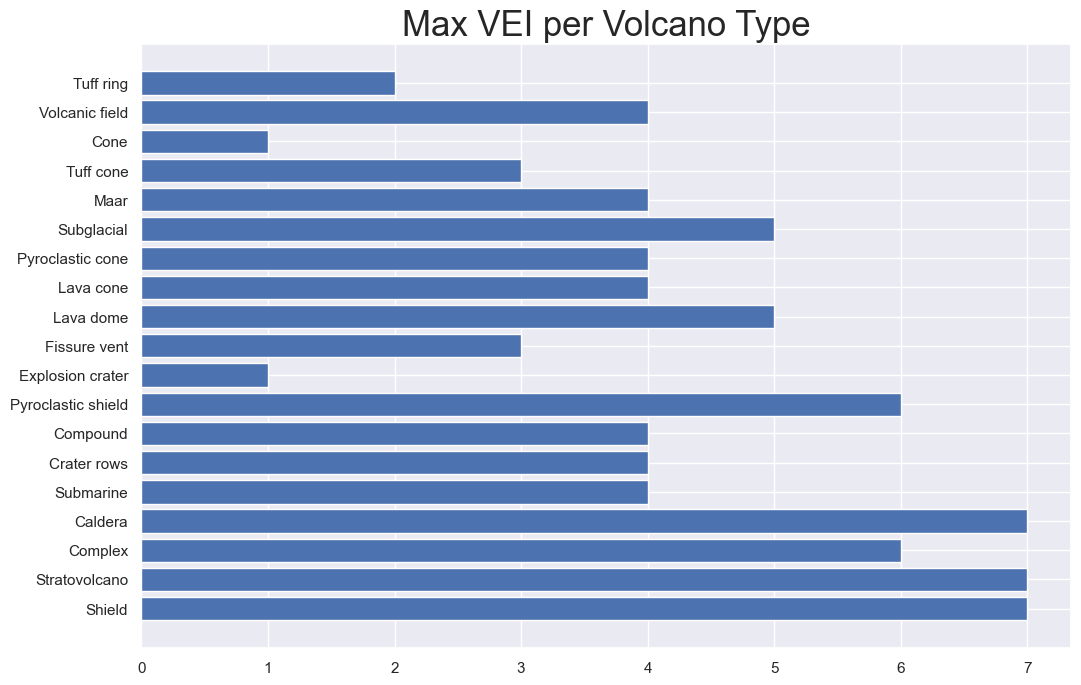

In [13]:
TypeAndMaxVEI = dict()
for x in df['primaryVolcanoType'].unique():
    TypeAndMaxVEI[x]= df[df['primaryVolcanoType']==x].maxVEI.max()

plt.barh(list(TypeAndMaxVEI.keys()), TypeAndMaxVEI.values(), align='center')
plt.grid(True,color='w', linestyle='solid')
plt.title("Max VEI per Volcano Type",fontsize=25)
plt.grid(True)
plt.show()

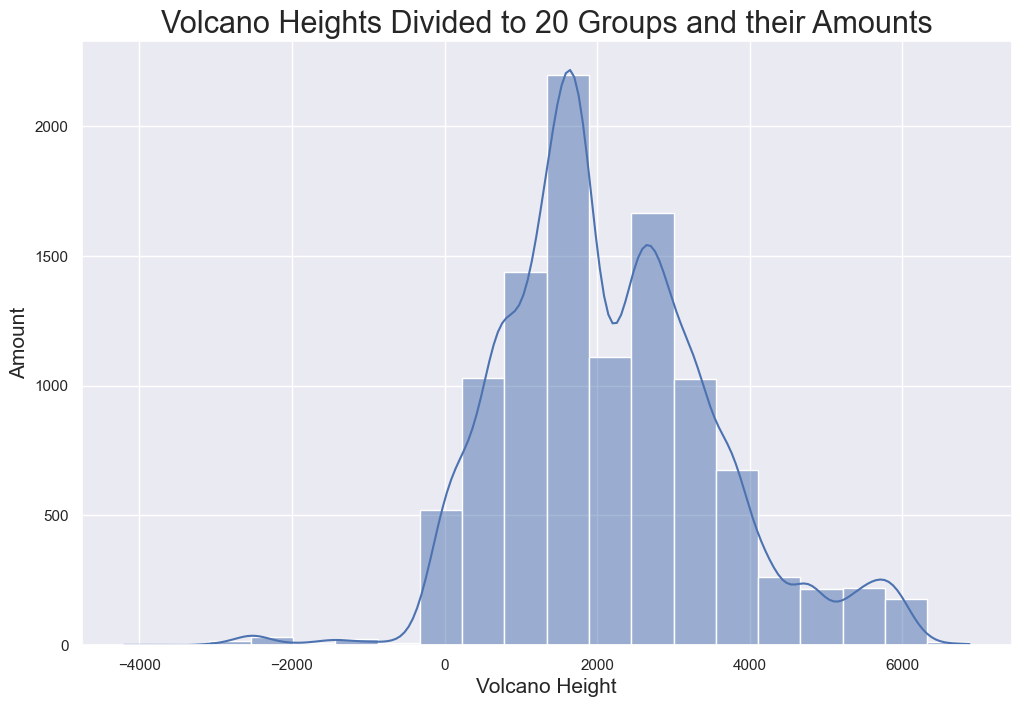

In [7]:
sns.set(style="darkgrid")
sns.histplot(data=df, x="volcanoHeight", kde=True,bins=20)
plt.title("Volcano Heights Divided to 20 Groups and their Amounts",fontsize=22)
plt.ylabel("Amount",fontsize=15)
plt.xlabel("Volcano Height",fontsize=15)
plt.show()

Text(0, 0.5, '')

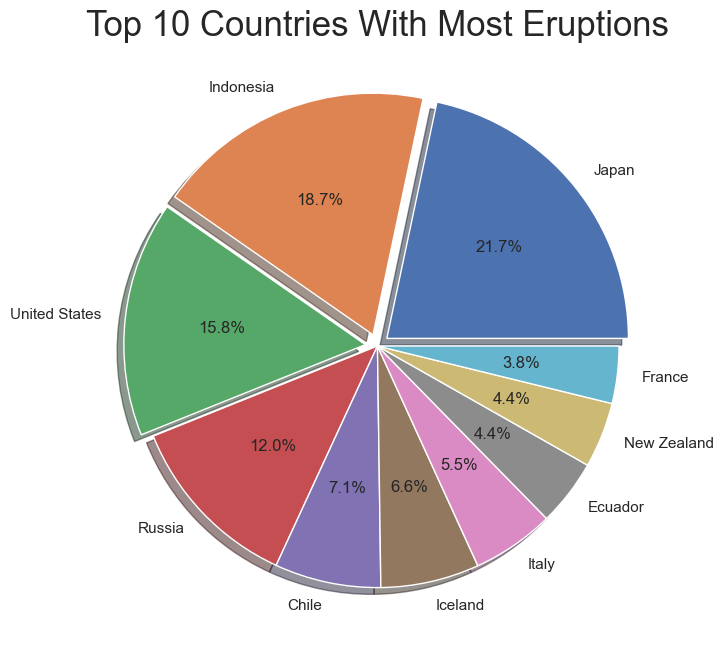

In [8]:
explode=[0.05,0.05,0.05,0,0,0,0,0,0,0]
df['country'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%',explode=explode,shadow=True)
plt.title("Top 10 Countries With Most Eruptions",fontsize=25)
plt.ylabel(None)

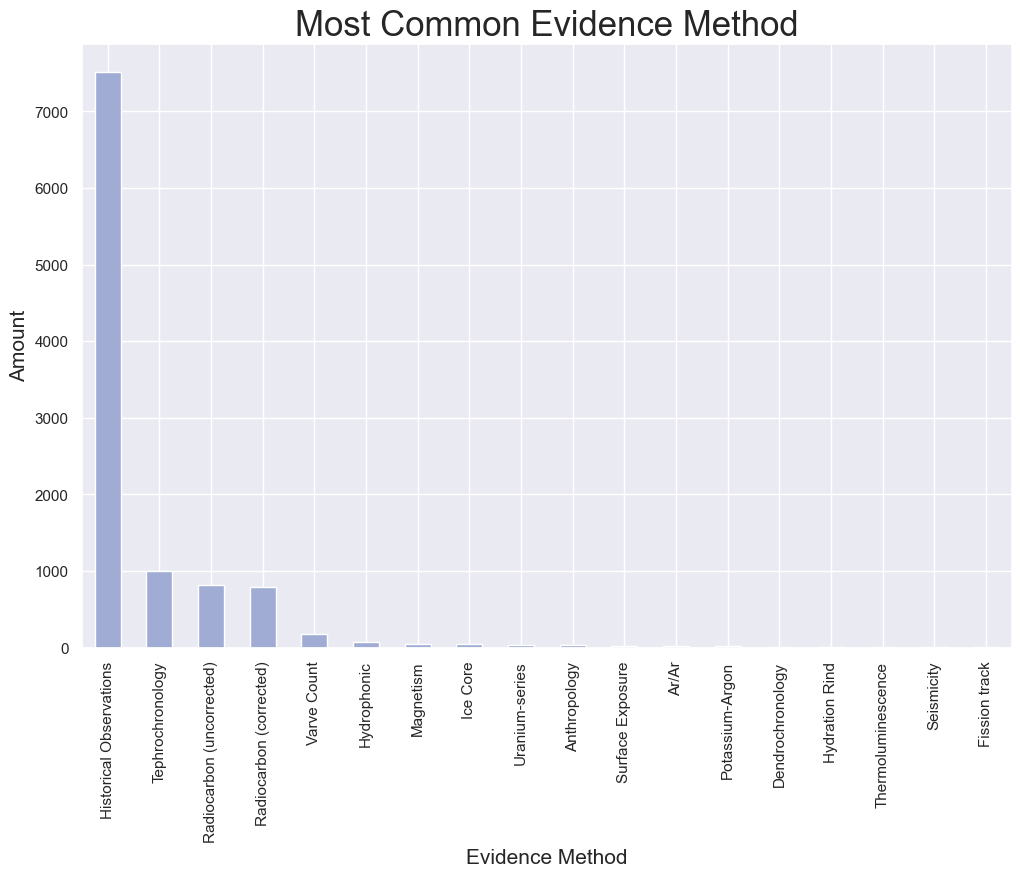

In [9]:
df['evidenceMethod'].value_counts().plot(kind='bar', color = '#a0acd4')
plt.title('Most Common Evidence Method',fontsize=25)
plt.xlabel('Evidence Method',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.grid(True)

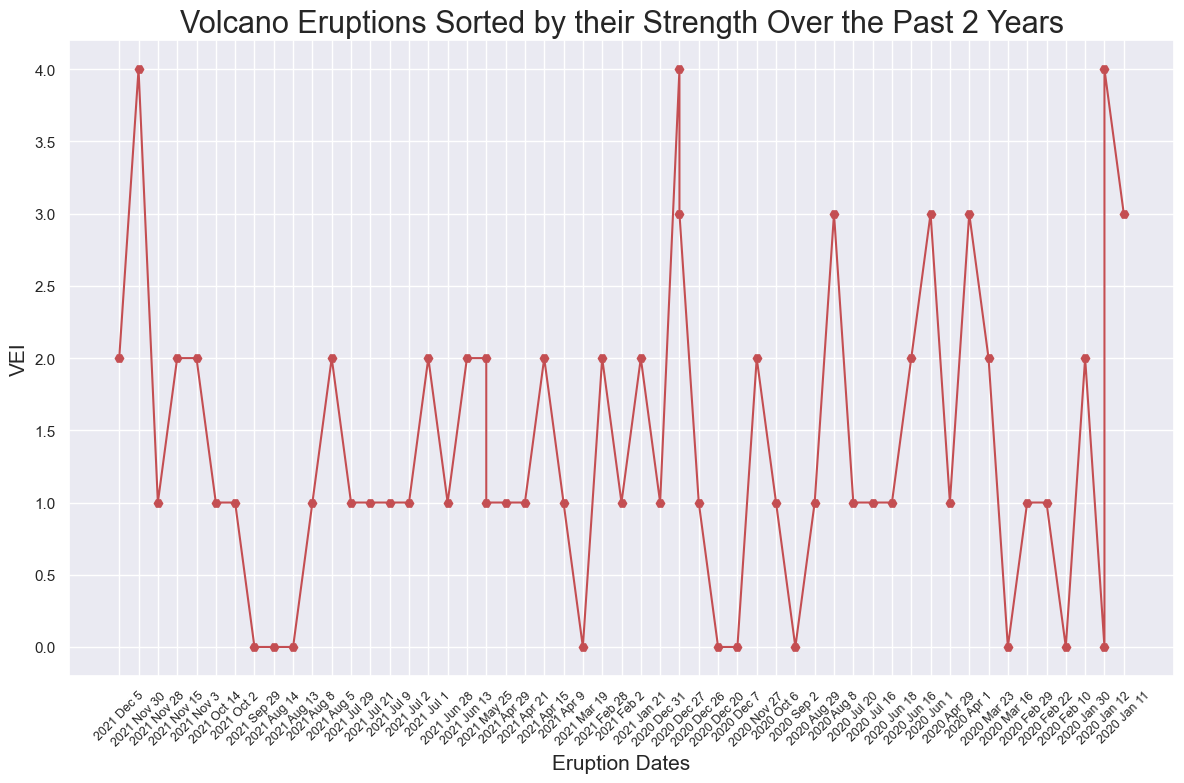

In [10]:
dates = df['startDate'].iloc[:56]
VEI = df['maxVEI'].iloc[:56]
plt.plot(dates, VEI, color = 'r', label='Eruption dates', marker='H')
plt.title('Volcano Eruptions Sorted by their Strength Over the Past 2 Years', fontsize=22)
plt.xlabel('Eruption Dates', fontsize=15)
plt.ylabel('VEI', fontsize=15)
plt.xticks(rotation=45)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.grid(True)
plt.tight_layout()

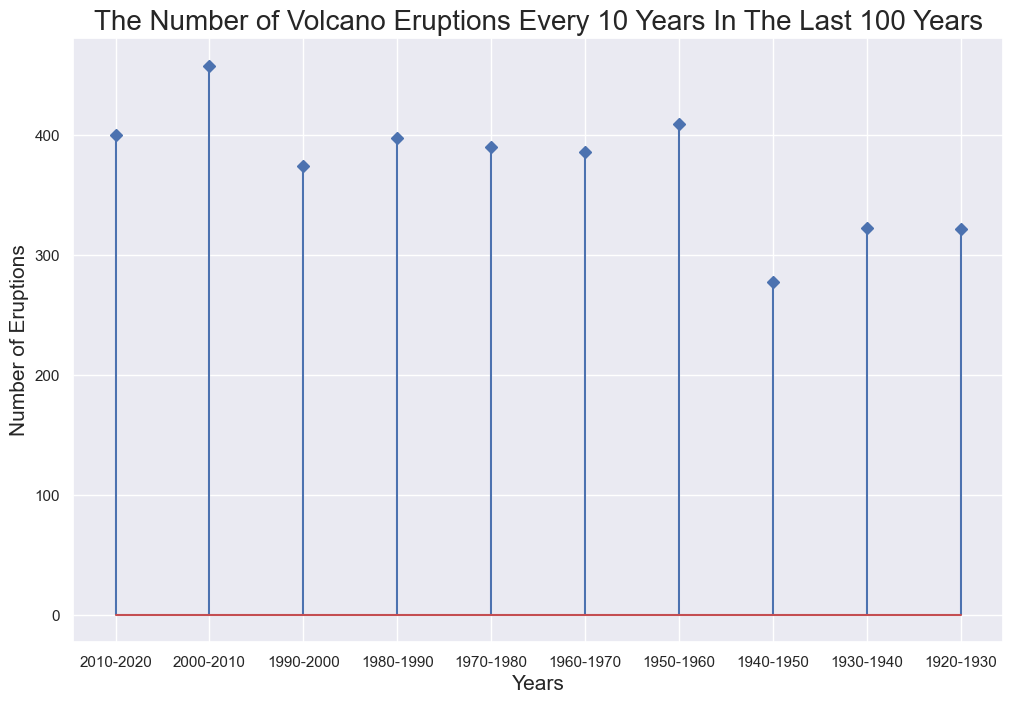

In [11]:
yearsList = list()
for i in range(0,len(df.startDate)):
    yearsList.append(int(df['startDate'][i].split()[0]))
temp = [0] * 10
currentStartYear = 2020
index=0
for i in yearsList:
    if(i==2021):
        continue
    if currentStartYear >= i >= currentStartYear-10:
        temp[index]+=1
    else:
        index+=1
        currentStartYear-=10
    if (i==1919):
        break
rangeList = list()
for i in range(2010,1910,-10):
    rangeList.append(str(i)+"-"+str(i+10))

res = dict(zip(rangeList, temp))

plt.stem(rangeList, temp, use_line_collection = True, markerfmt = 'D',label = temp)
plt.title('The Number of Volcano Eruptions Every 10 Years In The Last 100 Years',fontsize=20)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Eruptions',fontsize=15)
plt.grid(True)
plt.show()